In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
%matplotlib inline

In [3]:
# import library to display multiple outputs
from IPython.display import display # Importing dataset
data = pd.read_csv("titanic.csv")
# see some of it, their overall statistics and dimensions
display(data.head(5))
display(data.describe())
display(data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(891, 12)

In [4]:
# select rows from dataframe
x = data.iloc[:,:-1]
# sum of null data based on attributes
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [15]:
# Convert categorical variable to numeric
data["Sex_cleaned"] = np.where(data["Sex"]=="male",0,1) 
data["Embarked_cleaned"] = np.where(data["Embarked"]=="S",0,np.where(data["Embarked"]=="C",1, np.where(data["Embarked"]=="Q",2,3) ))
# Cleaning dataset of NaN
data = data[[ "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')


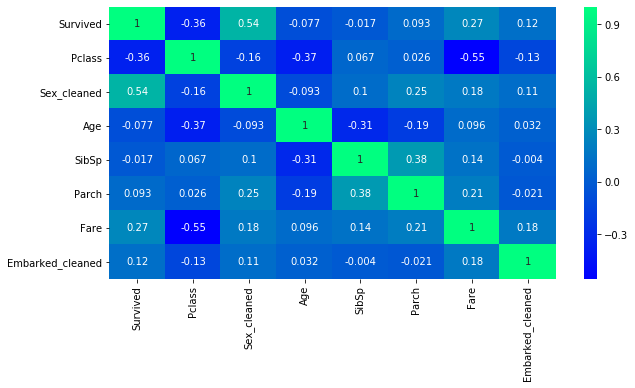

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='winter')
plt.show()

In [18]:
# Select specific/related features
used_features =[ "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]
X = data[used_features] # Select all attributes except the last one (descriptive attributes 
y = data["Survived"] # Classification on survived 'class' (target attribute)
print(y)
# Split dataset in training and test datasets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
# Instantiate the classifier
gnb = GaussianNB()

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [19]:
# Train classifier
gnb.fit(x_train,y_train)
# Test the classifier
predict = gnb.predict(x_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%" .format(x_test.shape[0], (y_test != predict).sum(),
gnb.score(x_test,y_test)*100 ))

Number of mislabeled points out of a total 286 points : 62, performance 78.32%


Text(0.5, 24.0, 'Predicted label')

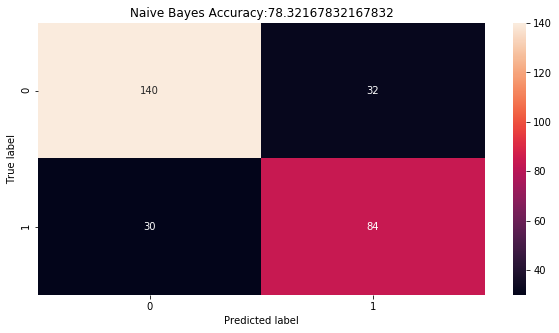

In [21]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100)) 
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [22]:
mean_survival = np.mean(y_train)
mean_not_survival = 1 - mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%" .format(100 * mean_survival, 100 * mean_not_survival))

Survival prob = 41.12%, Not survival prob = 58.88%


NameError: name 'GaussianNB' is not defined